# This notebook illustrates an example for the trade-off between bias and variance 

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### **First lets define a function and randomly chose *N* points within a desired range**
### For noise assume a desired peak-to-peak variation
### *x_test* is a test point outside the range that will be used later

In [31]:
def f(x):
    return .5 * x +np.log(1 + x ** 2) - np.sqrt(np.max(x -2 , 0)) - np.sin(x) + 2

N = 1000
x_range = 3
x = x_range * (2 * np.random.rand(N) - 1)
x_test = 3.1

## Create the noise from a desired peak-to-peak variation

In [32]:
peak_to_peak_noise = 4
noise = np.random.normal(0, peak_to_peak_noise / 6, N)


## Calculate *y* values for the *N* randomly selected *x* points in the range and the test point

In [33]:
y = f(x) + noise
y_test = f(x_test) + np.random.normal(0,peak_to_peak_noise / 6, 1)



## Plot the noisy data together with the function true values

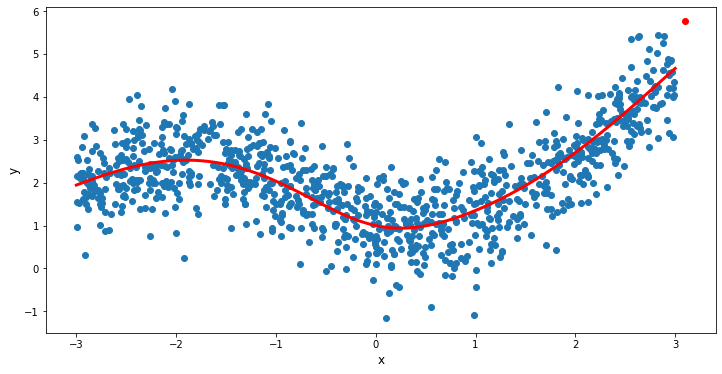

In [34]:
plt.figure(figsize=(12,6))
x_accurate = np.linspace(-x_range, x_range, 1000)
plt.scatter(x, y)
plt.plot(x_accurate, f(x_accurate), 'r', linewidth=3.0)
plt.scatter(x_test, y_test, c='r')
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.xticks(np.arange(start = -x_range, stop = x_range + 1, step = 1))
plt.show()

## Now lets assume that we can model the unknown non-linear function with a polynomial as below
##  $$\hat{f}(x) = w_{0} + w_{1}x + w_{2}x^2 + ... + w_{n}x^n$$
## The code below shows how to select *M%* of the points for training and fit them to get a order-n polynomial mode. 
## The coefficient of the polynomial is printed

In [35]:
M = .02 
n = 4

random_index = np.random.permutation(N)[0:int(M*N)]
x_train, y_train = x[random_index], y[random_index]

w = np.polyfit(x_train, y_train, n)
print(w)

[-0.02425667  0.13537071  0.54299538 -0.77211346  0.63232487]


## Now we define the function that can take these coefficients and calculate the estimate $\hat{f}(x)$

In [36]:
def fhat(x, w):
    exponents=np.arange(len(w) - 1, -1, -1)
    exponents.shape = (-1,1)
    powers = np.power(x, exponents)
    return np.dot(w, powers)

## Now lets plot the original function (red), the polynomial model and scatter the points

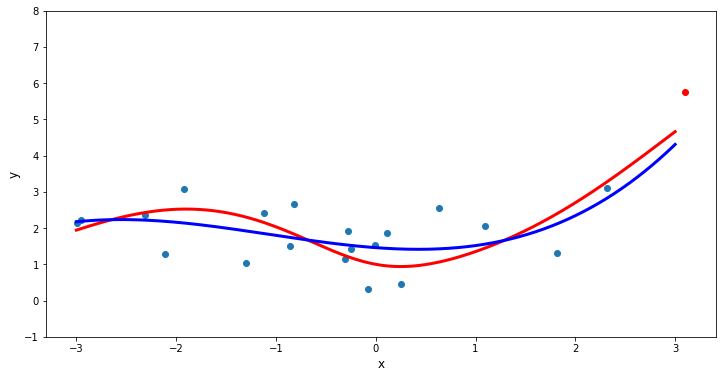

In [37]:
M = .02 
n = 3
random_index = np.random.permutation(N)[0:int(M*N)]
x_train, y_train = x[random_index], y[random_index]
w = np.polyfit(x_train, y_train, n)

yhat = fhat(x_train, w)
plt.figure(figsize=(12,6))
x_accurate = np.linspace(-x_range, x_range, 1000)
plt.scatter(x_train, y_train)
plt.plot(x_accurate, f(x_accurate), 'r', linewidth=3.0)
plt.plot(x_accurate, fhat(x_accurate,w), 'b', linewidth=3.0)
plt.scatter(x_test, y_test, c='r')
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.ylim((-1,8))
plt.xticks(np.arange(start = -x_range, stop = x_range + 1, step = 1))
plt.show()



## As we can see the polynomial can do a good job in matching to all the points if we increase *n* `BUT it is also fitting to the noise that was in the data!`

## Lets see what happens if we plot this for various values of *n* (order of polynomial)


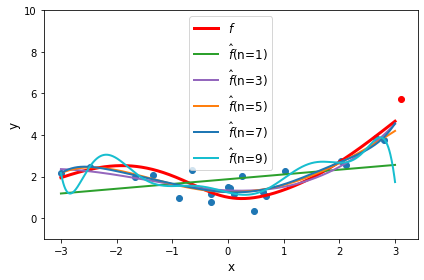

In [38]:
colors = np.array(['tab:green', 'tab:purple', 'tab:orange','tab:blue','tab:cyan'])
M = .02
    
random_index = np.random.permutation(N)[0:int(M*N)]
x_train, y_train = x[random_index], y[random_index]
plt.scatter(x_train, y_train)
plt.plot(x_accurate, f(x_accurate), 'r', linewidth=3.0)
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.scatter(x_test, y_test, c='r')
plt.ylim((-1,10))
    
for n in range(1,11, 2):
    w = np.polyfit(x_train, y_train, n)
    plt.plot(x_accurate, fhat(x_accurate, w), colors[n // 2], linewidth=2)

plt.legend([r'$f$', r'$\hat{f}$(n=1)',r'$\hat{f}$(n=3)',r'$\hat{f}$(n=5)', r'$\hat{f}$(n=7)', r'$\hat{f}$(n=9)'], fontsize=12)
plt.tight_layout()
plt.show()


## Now that we have the function, lets repeat this for polynomials of orders 1 to 5 and for reach of the repeat this 9 times

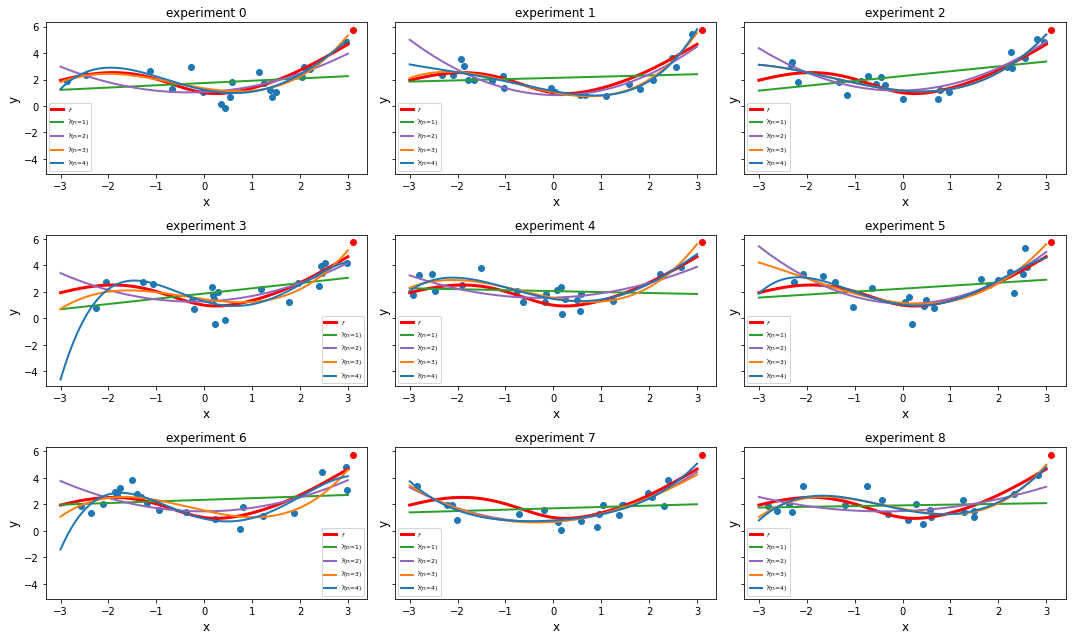

In [39]:
fig, axis = plt.subplots(3, 3, sharey=True, figsize=(15, 9))
colors = np.array(['tab:green', 'tab:purple', 'tab:orange','tab:blue','tab:cyan'])
M = .02
for i in range(9):
    random_index = np.random.permutation(N)[0:int(M*N)]
    x_train, y_train = x[random_index], y[random_index]
    axis[i // 3, i % 3].scatter(x_train, y_train)
    axis[i // 3, i % 3].plot(x_accurate, f(x_accurate), 'r', linewidth=3.0)
    axis[i // 3, i % 3].set_xlabel('x', size=12)
    axis[i // 3, i % 3].set_ylabel('y', size=12)
    axis[i // 3, i % 3].scatter(x_test, y_test, c='r')
    axis[i // 3, i % 3].title.set_text('experiment {}'.format(i))
    
    for n in range(1,5):
        w = np.polyfit(x_train, y_train, n)
        axis[i // 3, i % 3].plot(x_accurate, fhat(x_accurate, w), colors[n-1], linewidth=2)
    
    axis[i // 3, i % 3].legend([r'$f$', r'$\hat{f}$(n=1)',r'$\hat{f}$(n=2)',r'$\hat{f}$(n=3)', r'$\hat{f}$(n=4)'], fontsize=6)

plt.tight_layout()
plt.show()
        

## We can note big deviation of the red test point that is out of the range from higher order polynomial models.
## the lower the *n*, the more robust the models; meaning that their shape does not change much between the experiments
## However, we can notice the higher order models can be significantly different in each experiment and thus sensitive to the training data

# Now lets take random training sample 100k times and see for simplest model (n = 1) and a more complex model (for example n = 5) how does our test point behave

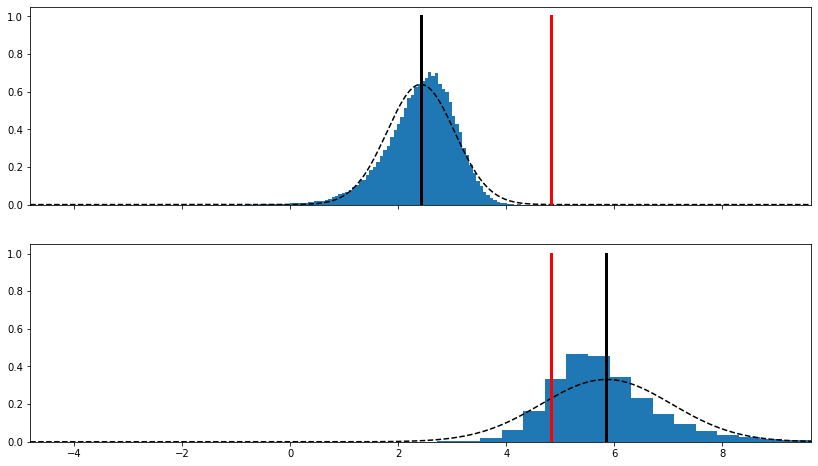

In [40]:
Experiment_numbers = 100000
order = 3
yhat_test_n1 = np.zeros((Experiment_numbers, 1))
yhat_test_norder = np.zeros((Experiment_numbers, 1))
for i in range(Experiment_numbers):
    random_index = np.random.permutation(N)[0:int(M*N)]
    x_train, y_train = x[random_index], y[random_index]
    w = np.polyfit(x_train, y_train, 1)
    yhat_test_n1[i] = fhat(x_test, w)
    w = np.polyfit(x_train, y_train, order)
    yhat_test_norder[i] = fhat(x_test, w)

linear_model_mean = np.mean(yhat_test_n1)
linear_model_std = np.std(yhat_test_n1)

norder_model_mean = np.mean(yhat_test_norder)
norder_model_std = np.std(yhat_test_norder)

fig, axis = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(14, 8))
axis[0].hist(yhat_test_n1, 100, density=True)
axis[1].hist(yhat_test_norder, 100, density=True)
axis[0].set_xlim((linear_model_mean - 6*norder_model_std,linear_model_mean + 6*norder_model_std))
x_values = np.linspace(plt.xlim()[0], plt.xlim()[1], 1000)
axis[0].plot(x_values, stats.norm.pdf(x_values, linear_model_mean, linear_model_std), color='black', ls='--')
axis[1].plot(x_values, stats.norm.pdf(x_values, norder_model_mean, norder_model_std), color='black', ls='--')
axis[0].plot([linear_model_mean, linear_model_mean], [0, 1], c='k', linewidth=3.0)
axis[1].plot([norder_model_mean, norder_model_mean], [0, 1], c='k', linewidth=3.0)
axis[0].plot([f(x_test), f(x_test)], [0, 1], c='r', linewidth=3.0)
axis[1].plot([f(x_test), f(x_test)], [0, 1], c='r', linewidth=3.0)



plt.show()

# We notice that as the order is increased the mean gets closer to the real value of $f(x)$ but at the same time the variance is increased.
# That means simpler models have higher biase (distance between red and black line) coming from oversimplification but smaller variance.
# The higher order (more complex) model has less bias but more dependent on noise of the data


## Now instead of 1 test point, lets pick 1000 random points and measure the errors for each point by models from order *n0=2* to *n1=5*

In [41]:
n0 = 0
n1 = 4
n_range = np.arange(n0, n1+1, 1)
Test_points_Number = 1000
sigma_epsilon = peak_to_peak_noise / 6
x_test = x_range + np.random.rand(Test_points_Number) - .5
epsilon = sigma_epsilon * np.random.randn(Test_points_Number)
y_test = f(x_test) + epsilon

Experiment_numbers = 10000
yhat_test = np.zeros((n1 - n0 + 1, Experiment_numbers, Test_points_Number))
train_squared_error = np.zeros((n1 - n0 + 1, Experiment_numbers)) 
print(yhat_test.shape)
for i in range(Experiment_numbers):
    random_index = np.random.permutation(N)[0:int(M*N)]
    x_train, y_train = x[random_index], y[random_index]
    for order in range(n0, n1+1, 1):
        w = np.polyfit(x_train, y_train, order)
        p = fhat(x_test, w)
        yhat_test[order-n0, i,:] = fhat(x_test, w)
        train_squared_error[order-n0, i] = np.mean((y_train - fhat(x_train, w)) ** 2)

     

(5, 10000, 1000)


# What we have done above:
## picked a number of test points
## repeat for desidered number of experiments:
- ### Generate random x values for training
- ### Train (fit) and find the coefficients $w$
- ### using the coefficients, estimate the y value for the test points $\hat{y}$
- ### saved all the $\hat{y}$ values in a 3D matrix with shape (orders, Experiment_numbers, Test_points_Number)

## Now we can calculated and plot Bias, Variance, and MSE

### For MSE we have:
# $$MSE = E[E[(y-\hat{y})^2]]$$
## where the first E is over all experiments and second is over all test points
## We can define a Matrix residual and assign it to $(y-\hat{y})^2$
### with help of python broadcasting, $(y-\hat{y})^2$ is calculated for all model orders and experiments

In [42]:
residual = (yhat_test - y_test) ** 2
residual = np.mean((yhat_test - y_test) ** 2, 1)


## Subsequently, we the means over experiments and test points as in the MSE quation

In [43]:
MSE = np.mean(residual, 1)



# if we now plot the result vs. order of model we notice that there is an optimum point were MSE is minimized and we will see why

## For Bias at each test point we have:
# $$ Bias = E[\hat{y}] - y$$
## where E is over all experiments. With all test points we can write:
# $$ E[Bias^2] = E[(E[\hat{f}(x)] - f(x))^2]$$
## so we can calculate it in the same way

In [44]:
Eyhat = np.mean(yhat_test, 1)
Bias_Squared = (Eyhat - f(x_test)) ** 2
Bias_Squared = np.mean(Bias_Squared, 1)


## And finally for variance we have:
# $$ varinace = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$
# Variace of data in dimension is first calculated and then is averaged over all points in the other dimension

In [45]:
Variance = np.var(yhat_test, 2)
Variance = np.mean(Variance, 1)


In [46]:
training_error = np.mean(train_squared_error, 1)

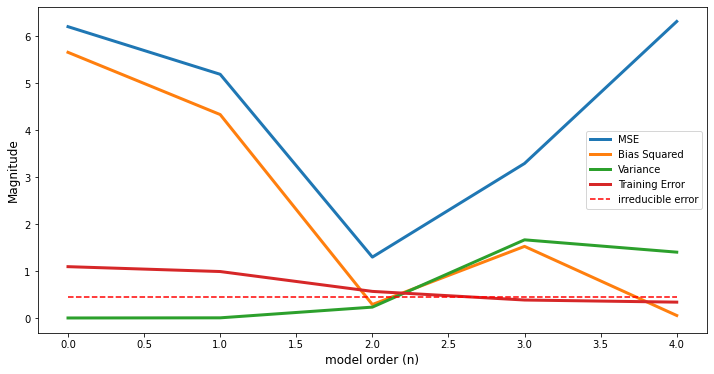

In [47]:
plt.figure(figsize=(12,6))
plt.plot(n_range, MSE, linewidth=3)
plt.xlabel('model order (n)', size=12)
plt.ylabel('Magnitude', size=12)
plt.plot(n_range, Bias_Squared, linewidth=3)
plt.plot(n_range, Variance, linewidth=3)
plt.plot(n_range, training_error, linewidth=3)
plt.plot(n_range, (sigma_epsilon ** 2) * np.ones_like(n_range), 'r--')

plt.legend(['MSE', 'Bias Squared', 'Variance', 'Training Error', 'irreducible error'])

plt.show()

# It can be analytically shown that:
# $$ MSE = bias^2 + Variace + noise power $$